In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
unicorns = pd.read_csv(r'C:\Users\frans\Documents\GitHub\Project4-WebScrap\Files\FinalUnicornsO3.csv')
unicorns.head()

,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion)
0,0,Bytedance,China,Artificial Intelligence,140.0
1,1,SpaceX,United States,Other,100.3
2,2,Shein,China,E-commerce & direct-to-consumer,100.0
3,3,Stripe,United States,Fintech,95.0
4,4,Klarna,Sweden,Fintech,45.6


Text(0.5, 0, 'Unicorn Name')

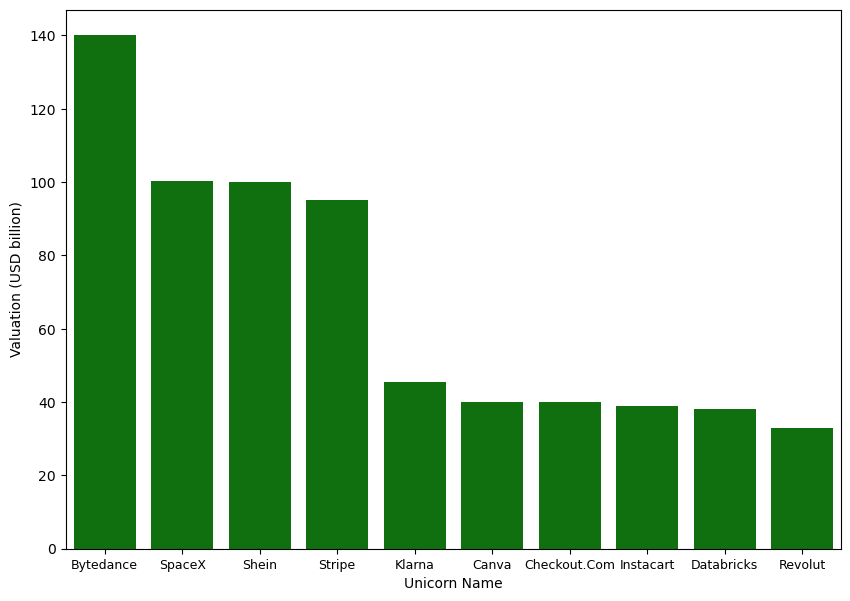

In [25]:
### Top Unicorns x Valuation

# Grab the data
TopUxV = unicorns[['Name','Valuation ($ Billion)']].sort_values(by = 'Valuation ($ Billion)', ascending=False)[:10]

# Plot
fig01, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = TopUxV, x ='Name', y ='Valuation ($ Billion)', color = 'Green')
ax.set_ylabel('Valuation (USD billion)')
plt.xticks(fontsize=9)
ax.set_xlabel('Unicorn Name')

Text(0, 0.5, 'Number of unicorns')

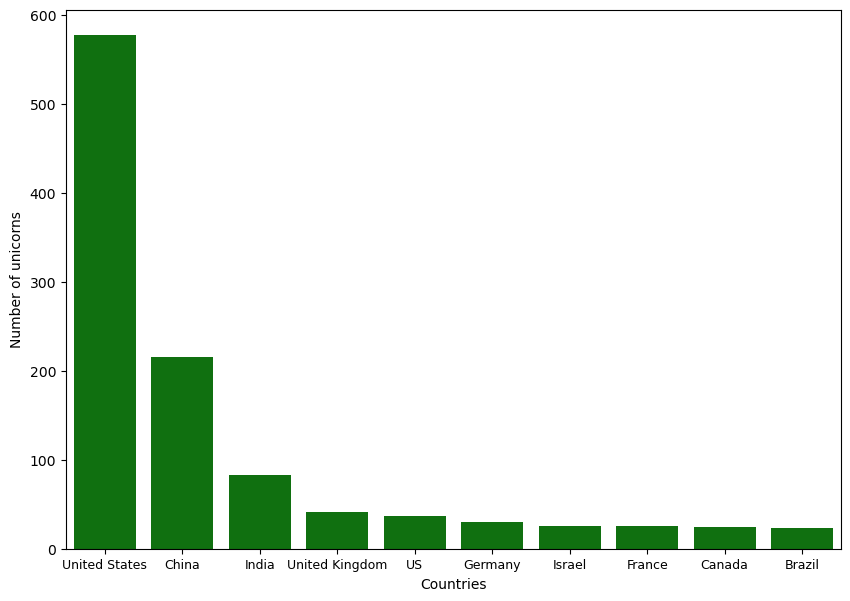

In [26]:
### Top Countries x Num of Unicorns

# Plot
fig02, ax = plt.subplots(figsize = (10, 7))
sns.countplot( x = 'Country', data = unicorns, color="Green", order=unicorns.Country.value_counts().index[:10])
ax.set_xlabel('Countries')
plt.xticks(fontsize=9)
ax.set_ylabel('Number of unicorns')

Text(0, 0.5, 'Sum of Valuations in USD Billion')

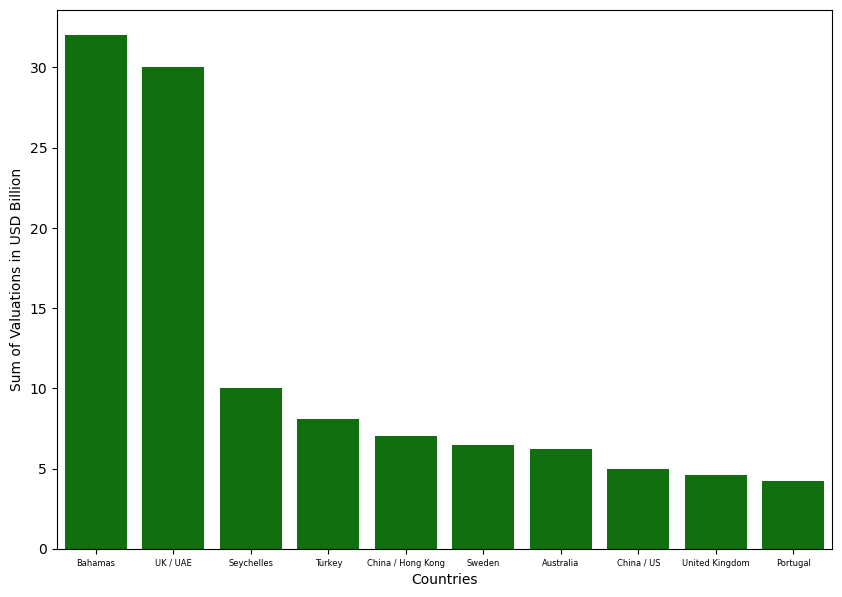

In [27]:
### Top Countries x Valutions
 
# Grab the data
TopCxV = unicorns.groupby('Country')['Valuation ($ Billion)'].mean().sort_values(ascending=False)[:10]

# Plot
fig03, ax = plt.subplots(figsize = (10, 7))
sns.barplot( x = TopCxV.index , y = TopCxV.values, color="Green")
ax.set_xlabel('Countries')
plt.xticks(fontsize=6)
ax.set_ylabel('Sum of Valuations in USD Billion')

In [29]:
Top = unicorns[['Country','Valuation ($ Billion)']]
Top

,Country,Valuation ($ Billion)
0,China,140.0
1,United States,100.3
2,China,100.0
3,United States,95.0
4,Sweden,45.6
...,...,...
1261,Indonesia,1.0
1262,Canada,1.0
1263,India,1.1
1264,India,1.4


<AxesSubplot:xlabel='Country', ylabel='Valuation ($ Billion)'>

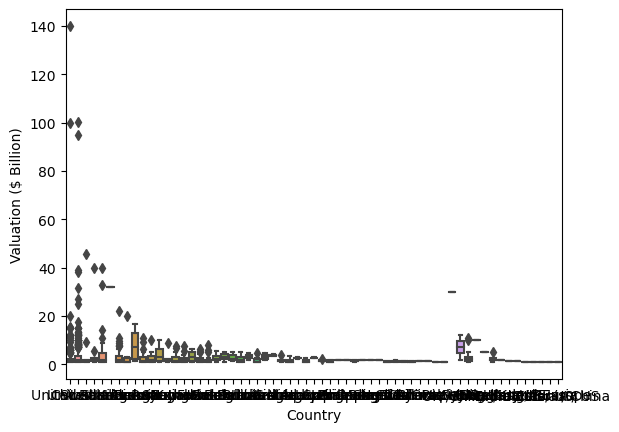

In [30]:
### boxplots to show why us and others are not on this plots
sns.boxplot(data=Top, x='Country', y = 'Valuation ($ Billion)')

<AxesSubplot:xlabel='Country', ylabel='Valuation ($ Billion)'>

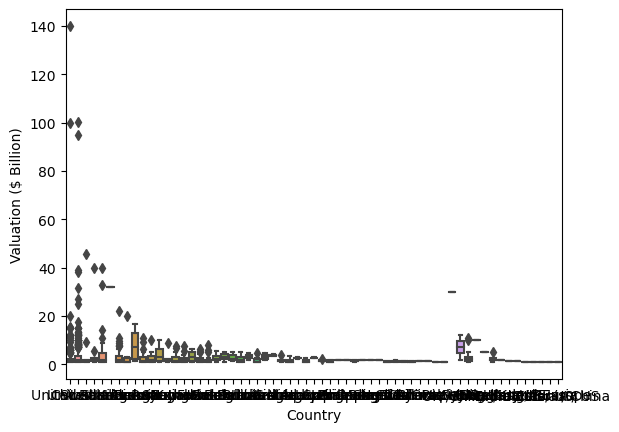

In [31]:
### boxplots to show why us and others are not on this plots
sns.boxplot(data=unicorns, x='Country', y = 'Valuation ($ Billion)')

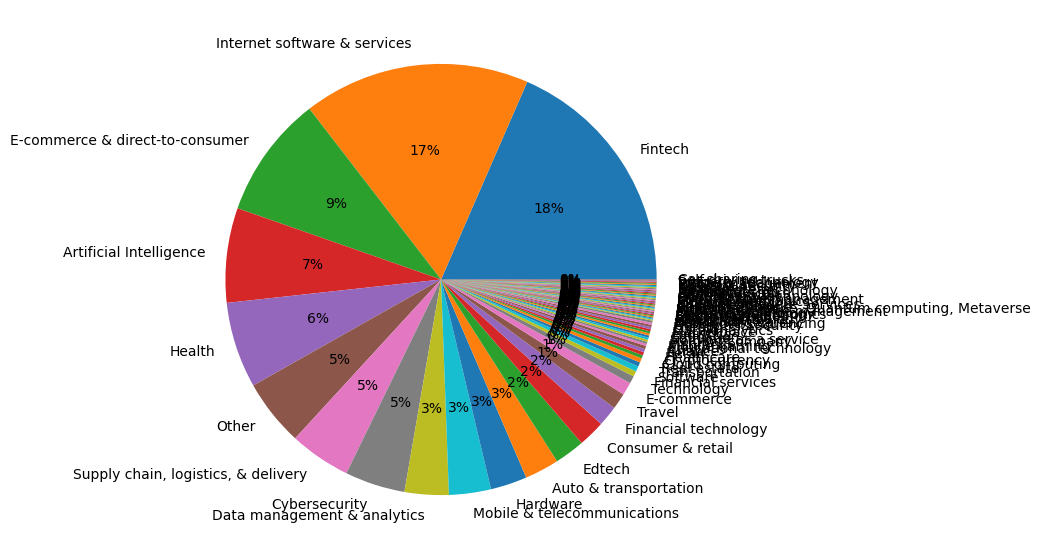

In [32]:
### Top Industries x Num of unicorns

# Grab the data
TopIxU = unicorns.Industry.value_counts().sort_values(ascending=False)
labels = TopIxU.index
data = TopIxU.values

# Plot
fig04, ax = plt.subplots(figsize = (10, 7))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Text(0, 0.5, 'Sum of Valuations in USD Billion')

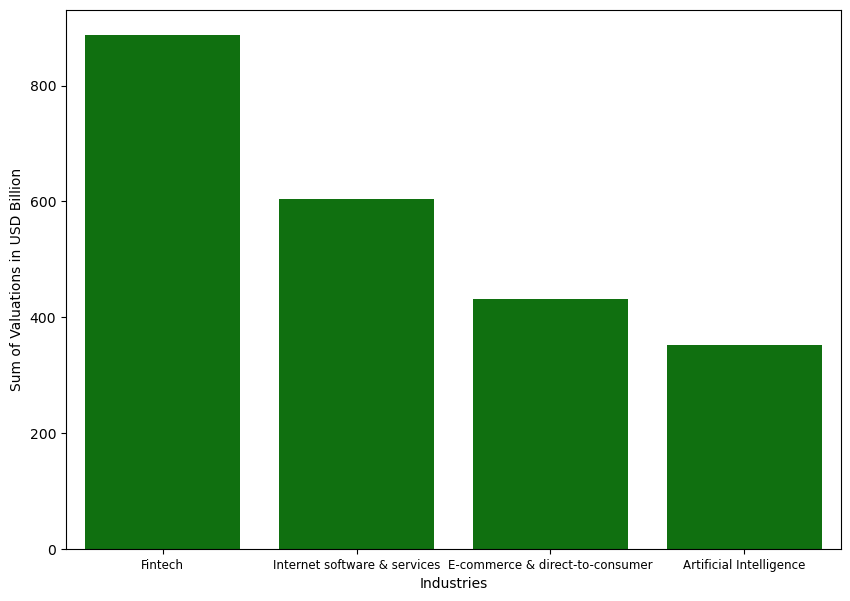

In [33]:
### Top Industries x Valuation
# Grab the data
TopIxV = unicorns.groupby('Industry')['Valuation ($ Billion)'].sum().sort_values(ascending=False)[:4]

# Plot
fig05, ax = plt.subplots(figsize = (10, 7))
sns.barplot( x = TopIxV.index , y = TopIxV.values, color="Green")
ax.set_xlabel('Industries')
plt.xticks(fontsize=8.5)
ax.set_ylabel('Sum of Valuations in USD Billion')

In [34]:
### Top Unicorn per industry
table = pd.pivot_table(unicorns, index="Industry", values="Name", aggfunc="first").reset_index()
TopUxI = pd.merge(left=table, right=unicorns, on='Name', how='left')
TopUxI[['Industry_x','Name', 'Valuation ($ Billion)']].sort_values(by='Valuation ($ Billion)', ascending=False)[:5]

,Industry_x,Name,Valuation ($ Billion)
1,Artificial Intelligence,Bytedance,140.0
55,Other,SpaceX,100.3
20,E-commerce & direct-to-consumer,Shein,100.0
30,Fintech,Stripe,95.0
46,Internet software & services,Canva,40.0


In [35]:
### Top Industry x Country
TopUxC = pd.pivot_table(unicorns, index="Industry", values="Country", aggfunc="first").reset_index()
TopUxC

,Industry,Country
0,Advertising technology,South Korea
1,Artificial Intelligence,China
2,Auto & transportation,China
3,Biotechnology,US
4,Blockchain,Israel
...,...,...
71,Technology,China
72,Transportation,China
73,Travel,India
74,Waste management,US
